## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/nataliawijaya/Documents/Bootcamp/New York Citi Bikes/02 Data'

In [4]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'citibike_cleaned_age.csv'), index_col = False)

In [5]:
df.head()

,Unnamed: 0,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,start_day,end_year,end_month,end_week,end_day,end_hour,days_category,peak_hours,avg_trip_duration_each_hour,day_of_week
0,0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,...,9,2013,9,37,9,18,Weekdays,Peak hours,14.1,2
1,1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,...,12,2013,9,37,12,18,Weekdays,Peak hours,14.1,5
2,2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,...,18,2013,9,38,18,19,Weekdays,Peak hours,13.2,4
3,3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,...,28,2013,9,39,28,12,Weekend,Normal hours,14.0,7
4,5,14581,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,...,27,2013,9,39,27,22,Weekdays,Normal hours,12.7,6


In [6]:
df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df.head()

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,...,start_day,end_year,end_month,end_week,end_day,end_hour,days_category,peak_hours,avg_trip_duration_each_hour,day_of_week
0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,...,9,2013,9,37,9,18,Weekdays,Peak hours,14.1,2
1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,...,12,2013,9,37,12,18,Weekdays,Peak hours,14.1,5
2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,...,18,2013,9,38,18,19,Weekdays,Peak hours,13.2,4
3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,...,28,2013,9,39,28,12,Weekend,Normal hours,14.0,7
4,14581,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,432,...,27,2013,9,39,27,22,Weekdays,Normal hours,12.7,6


In [8]:
df.shape

(40110, 32)

In [9]:
df.isnull().sum()

bike_id                        0
weekday                        0
start_hour                     0
start_time                     0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_time                       0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
trip_duration                  0
subscriber                     0
birth_year                     0
gender                         0
gender_category                0
trip_duration_min              0
start_year                     0
start_month                    0
start_week                     0
start_day                      0
end_year                       0
end_month                      0
end_week                       0
end_day                        0
end_hour                       0
days_category                  0
peak_hours                     0
avg_trip_d

In [10]:
df.head()

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,...,start_day,end_year,end_month,end_week,end_day,end_hour,days_category,peak_hours,avg_trip_duration_each_hour,day_of_week
0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,...,9,2013,9,37,9,18,Weekdays,Peak hours,14.1,2
1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,...,12,2013,9,37,12,18,Weekdays,Peak hours,14.1,5
2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,...,18,2013,9,38,18,19,Weekdays,Peak hours,13.2,4
3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,...,28,2013,9,39,28,12,Weekend,Normal hours,14.0,7
4,14581,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,432,...,27,2013,9,39,27,22,Weekdays,Normal hours,12.7,6


In [11]:
df.describe()

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,...,start_month,start_week,start_day,end_year,end_month,end_week,end_day,end_hour,avg_trip_duration_each_hour,day_of_week
count,40110.000000,40110.000000,40110.000000,40110.000000,40110.000000,40110.000000,40110.000000,40110.000000,40110.00000,40110.000000,...,40110.0,40110.000000,40110.000000,40110.0,40110.0,40110.000000,40110.000000,40110.000000,40110.000000,40110.000000
mean,17614.674346,14.087509,437.021491,40.734576,-73.990948,434.348641,40.734171,-73.991241,770.76547,1975.710297,...,9.0,37.475443,15.199651,2013.0,9.0,37.475617,15.203191,14.229693,13.419683,4.114660
std,1675.729045,4.939407,340.742302,0.019579,0.012373,331.932718,0.019581,0.012359,523.61799,10.840430,...,0.0,1.138399,7.847837,0.0,0.0,1.138227,7.847807,4.984178,0.937933,1.885842
min,14556.000000,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.00000,1940.000000,...,9.0,35.000000,1.000000,2013.0,9.0,35.000000,1.000000,0.000000,10.200000,1.000000
25%,16188.000000,10.000000,304.000000,40.721101,-74.000040,305.000000,40.720874,-74.000271,395.00000,1968.000000,...,9.0,37.000000,9.000000,2013.0,9.0,37.000000,9.000000,10.000000,12.700000,3.000000
50%,17579.000000,15.000000,402.000000,40.736494,-73.990765,402.000000,40.735877,-73.990985,622.00000,1978.000000,...,9.0,37.000000,15.000000,2013.0,9.0,37.000000,15.000000,15.000000,13.500000,4.000000
75%,19028.000000,18.000000,485.000000,40.750073,-73.981923,483.000000,40.749013,-73.982578,999.00000,1984.000000,...,9.0,38.000000,22.000000,2013.0,9.0,38.000000,22.000000,18.000000,14.100000,6.000000
max,20642.000000,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.00000,1997.000000,...,9.0,39.000000,28.000000,2013.0,9.0,39.000000,29.000000,23.000000,14.700000,7.000000


In [12]:
df_scaled = df[['start_hour', 'birth_year', 'avg_trip_duration_each_hour']].copy()
df_scaled

,start_hour,birth_year,avg_trip_duration_each_hour
0,18,1968,14.1
1,18,1983,14.1
2,19,1989,13.2
3,11,1988,14.0
4,22,1986,12.7
...,...,...,...
40105,15,1973,14.5
40106,16,1975,14.7
40107,17,1970,14.0
40108,18,1961,14.1


## Data Prepocessing

### Standardization

In [13]:
from sklearn.preprocessing import StandardScaler 

# define standard scaler 
scaler = StandardScaler() 

In [14]:
# Transform data 
df_std = scaler.fit_transform(df_scaled)

In [15]:
df_std

array([[ 0.79210718, -0.71126266,  0.72534481],
       [ 0.79210718,  0.67246359,  0.72534481],
       [ 0.99456318,  1.22595409, -0.23422358],
       ...,
       [ 0.58965119, -0.52676583,  0.6187261 ],
       [ 0.79210718, -1.35700158,  0.72534481],
       [ 1.39947517,  0.39571834, -0.55407971]])

### PCA

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA()
pca.fit(df_std)

PCA()

In [18]:
# The attribute shows how much variance is explained by each of the three individuao components.
pca.explained_variance_ratio_

array([0.49027877, 0.33419213, 0.1755291 ])

Text(0, 0.5, 'Cumulative Explained Variance')

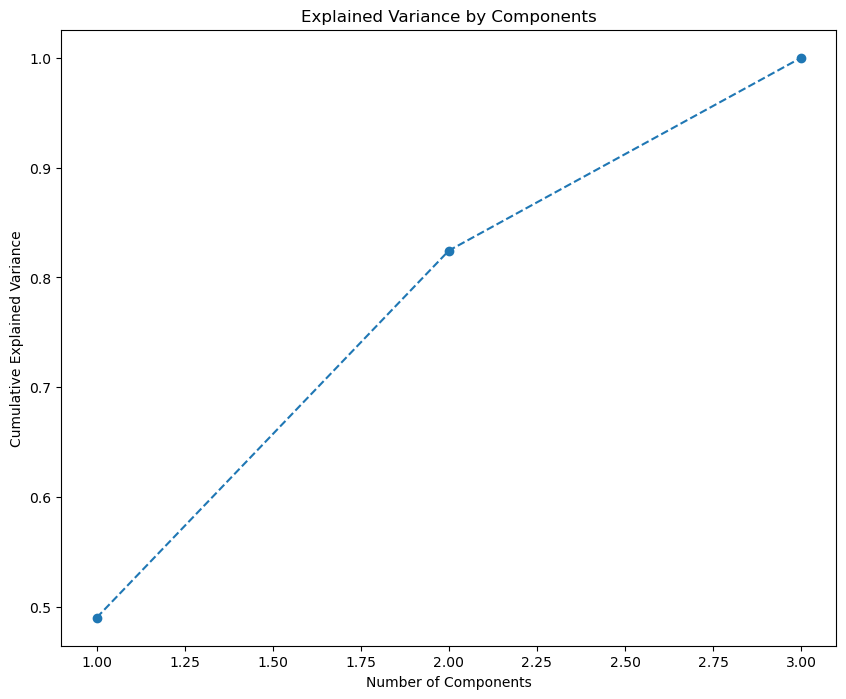

In [19]:
plt.figure(figsize = (10,8))
plt.plot(range(1,4), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [20]:
# 2 components has been selected
pca = PCA(n_components = 2)

In [21]:
# Fit the model
pca.fit(df_std)

PCA(n_components=2)

In [22]:
pca.transform(df_std)

array([[-1.00663239,  0.79269373],
       [-1.12812503, -0.57663216],
       [-0.64759938, -1.26504026],
       ...,
       [-0.80478616,  0.59865268],
       [-0.94993583,  1.43171248],
       [-0.63721031, -0.4965872 ]])

In [23]:
scores_pca = pca.transform(df_std)

Notes:

We’ll incorporate the newly obtained PCA scores in the K-means algorithm. That's how we can perform segmentation based on principal components scores instead of the original features.

## K-means clustering with PCA

In [24]:
wcss = []
for i in range(1,10):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 20)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

Text(0.5, 1.0, 'K-means with PCA Clustering')

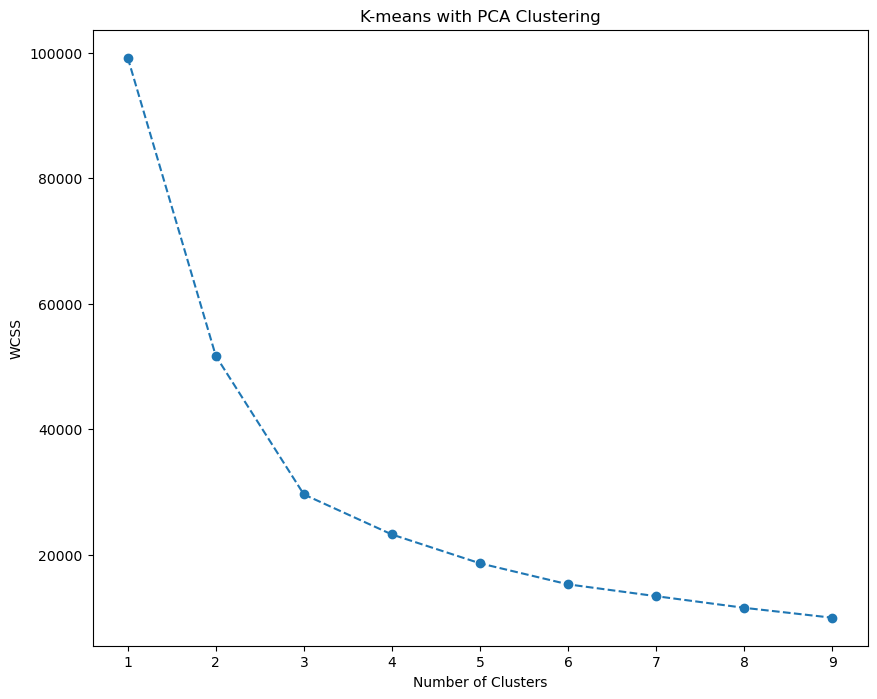

In [25]:
plt.figure(figsize = (10,8))
plt.plot(range(1,10), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')

And from this graph, we determine the number of clusters we’d like to keep. To that effect, we use the Elbow-method. The approach consists of looking for a kink or elbow in the WCSS graph. Usually, the part of the graph before the elbow would be steeply declining, while the part after it – much smoother. In this case, I will choose 3

In [26]:
# 3 clusters have been chosen, so now run K-means with number of clusters equals three
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 40)

In [27]:
# Fit the data with the k-means pca model
kmeans_pca.fit(scores_pca)

/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=40)

### K-means clustering with PCA Results

In [47]:
# Create a new df with the original features and add the PCA scores and assigned clusters
df_pca_kmeans = pd.concat([df_scaled, pd.DataFrame(scores_pca)], axis = 1)
df_pca_kmeans.columns.values[-2:] = ['component_1', 'component_2']
# The last column contains the pca k=means clustering labels
df_pca_kmeans['segment k-means PCA'] = kmeans_pca.labels_

In [48]:
df_pca_kmeans.head()

,start_hour,birth_year,avg_trip_duration_each_hour,component_1,component_2,segment k-means PCA
0,18,1968,14.1,-1.006632,0.792694,0
1,18,1983,14.1,-1.128125,-0.576632,1
2,19,1989,13.2,-0.647599,-1.265040,1
3,11,1988,14.0,-0.090607,-1.022039,1
4,22,1986,12.7,-0.679702,-1.078496,1


In [49]:
df_pca_kmeans['segment k-means PCA'].value_counts(dropna = False)

segment k-means PCA
1    19979
0    10783
2     9348
Name: count, dtype: int64

In [50]:
# Create a new column named ‘segment’ and map the three clusters directly inside it
df_pca_kmeans['segment'] = df_pca_kmeans['segment k-means PCA'].map({0: 'first', 1: 'second', 2: 'third'})

In [51]:
df_pca_kmeans.head()

,start_hour,birth_year,avg_trip_duration_each_hour,component_1,component_2,segment k-means PCA,segment
0,18,1968,14.1,-1.006632,0.792694,0,first
1,18,1983,14.1,-1.128125,-0.576632,1,second
2,19,1989,13.2,-0.647599,-1.265040,1,second
3,11,1988,14.0,-0.090607,-1.022039,1,second
4,22,1986,12.7,-0.679702,-1.078496,1,second


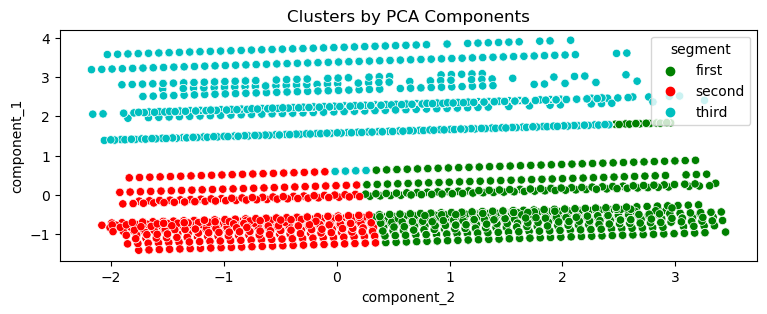

In [79]:
# Plot data by PCA components. The Y axis is the first component, the X axis is the second
x_axis = df_pca_kmeans['component_2']
y_axis = df_pca_kmeans['component_1']

plt.figure(figsize = (9,3))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_pca_kmeans['segment'], palette = ['g', 'r', 'c'])
plt.title('Clusters by PCA Components')
plt.show()

- Honestly I am little bit surprised with the result, it looks really different than before. And unfortunately, I can't really interpret it
- I am still not sure if what I am doing is correct because I am still not familiar with this but I just tried to do my best
- I think I also missed the ride_count